In [14]:
import pandas as pd
import pandas_datareader
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets, interactive, interact
from IPython.display import display
from matplotlib.animation import FuncAnimation
from plotly.subplots import make_subplots
%matplotlib notebook

In [6]:
def prepare_date(ticker,start,end):
    summary = []
    stock_df = web.get_data_yahoo(ticker,start,end) 
    monthly_returns = stock_df['Adj Close'].resample('M').ffill().pct_change()
    yearly_returns =  stock_df['Adj Close'].resample('Y').ffill().pct_change()
    std_series = pd.Series(monthly_returns.groupby(monthly_returns.index.year).std(),name='std')
    df = std_series.to_frame()
    mean_series = pd.Series(monthly_returns.groupby(monthly_returns.index.year).mean(),name='mean')
    df['mean'] = mean_series.to_frame()
    cum_return = (yearly_returns+1).cumprod()
    cum_yearly_return =  pd.Series(cum_return.groupby(cum_return.index.year).sum(),name='cum_yearly_return')
    df['cum_yearly_return'] = cum_yearly_return.to_frame()
    for index, row in df.iterrows():
        summary.append([index, row[0], row[1], row[2]])
        
    return df,summary

In [7]:
# Run this first to get the df to be populated
ticker = "spy"
start = "1990-01-01"
end   = "2022-01-01"
df, summary = prepare_date(ticker,start,end)

<IPython.core.display.Javascript object>


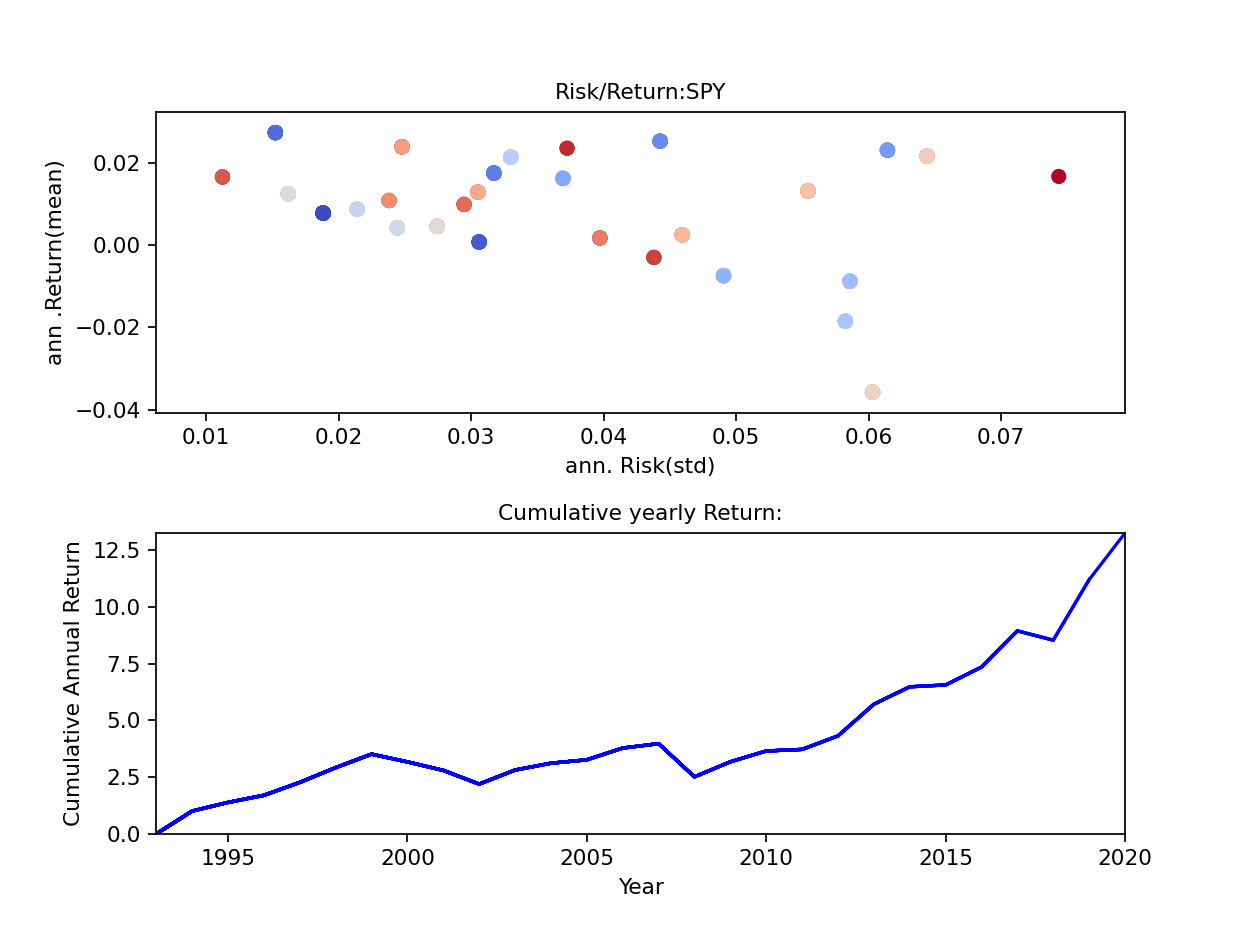

Button(description='Refresh', style=ButtonStyle())

interactive(children=(Dropdown(description='Ticker:', index=59, options=('ACWI', 'AGG', 'BIL', 'BND', 'BNDX', …

<function __main__.plot_data(symbol, start_year, end_year)>

In [15]:
global anim
global ax1,ax2

fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
global x,y,z
# Create two bounded text box that allow only numbers between the min year and the max year 
start_year = widgets.IntText(
    value=df.index.min(),
    description='Start Year:',
    color='black'
)
end_year = widgets.IntText(
    value=df.index.max(),
    description='End Year:',
    color='black'
)
stock = widgets.Dropdown(
    options= ['ACWI', 'AGG', 'BIL', 'BND', 'BNDX', 'BSV', 'DFAC','DGRO', 'DIA', 'DVY', 'EEM', 'EFA', 
              'EFV', 'EMB', 'ESGU', 'GLD', 'GOVT', 'HYG', 'IAU', 'IEF', 'IEFA','IEMG', 'IGSB', 'IJH', 
              'IJR', 'ITOT', 'IUSB', 'IVE', 'IVV', 'IVW', 'IWB', 'IWD', 'IWF', 'IWM', 'IWN','IWR', 'IWS', 
              'IXUS', 'JPST', 'LQD', 'MBB', 'MDY', 'MINT', 'MUB', 'PFF', 'QQQ', 'QUAL', 'RSP', 'SCHA',
              'SCHD', 'SCHF', 'SCHG', 'SCHP', 'SCHX', 'SCZ', 'SDY', 'SHV', 'SHY', 'SPLG', 'SPY', 'SPYV', 
              'TIP', 'TLT', 'TQQQ', 'USMV', 'VB', 'VBK', 'VBR', 'VCIT', 'VCSH', 'VEA', 'VEU', 'VGK', 'VGT', 
              'VHT', 'VIG', 'VMBS', 'VNQ', 'VO', 'VOE', 'VOO', 'VT', 'VTEB', 'VTI', 'VTIP', 'VTV', 'VUG', 
              'VV', 'VWO', 'VXF', 'VXUS', 'VYM', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY'],
    value='SPY',
    description='Ticker:',
)
def plot_data(symbol, start_year, end_year):
    global anim
    global x1,y1,x2,y2,z
    global ax1, ax2
    #global start,end
    ax1.clear()
    ax2.clear()
    x1,y1,x2,y2,z = [],[],[],[],[]
    start=str(start_year)+"-01-01"
    end=str(end_year)+"-01-01"
    df,summary = prepare_date(symbol,start,end)
    max_frames = len(summary)
    anim =FuncAnimation(fig, animate, frames=max_frames, interval=500, repeat=False,fargs=(summary,symbol))
    return anim
# function that draws each frame of the animation
def animate(i,summary,ticker):
    std = summary[i][1]
    mean = summary[i][2]
    z.append(summary[i][0])
    x1.append(std)
    y1.append(mean)
    ax1.scatter(x1, y1,c=z,cmap='coolwarm')
    ax1.set_xlim([np.min(x1)-0.005,np.max(x1)+0.005])
    ax1.set_ylim([np.min(y1)-0.005,np.max(y1)+0.005])
    ax1.set_xlabel("ann. Risk(std)", fontsize =10)
    ax1.set_ylabel("ann .Return(mean)", fontsize = 10)
    ax1.set_title("Risk/Return:"+ticker, fontsize = 10)
    x2.append(summary[i][0])
    y2.append(summary[i][3])
    ax2.plot(x2,y2,color='blue')
    ax2.set_xlim([np.min(x2),np.max(x2)])
    ax2.set_ylim([np.min(y2),np.max(y2)])
    ax2.set_xlabel("Year", fontsize =10)
    ax2.set_ylabel("Cumulative Annual Return", fontsize = 10)
    ax2.set_title("Cumulative yearly Return:", fontsize = 10)

button = widgets.Button(description="Refresh")
def on_button_clicked(b):
    start=str(start_year.value)+"-01-01"
    end=str(end_year.value)+"-01-01"
    symbol = str(stock.value)
    plot_data(symbol,start,end)   

button.on_click(on_button_clicked)
display(button)    

interact(plot_data,symbol=stock, start_year=start_year, end_year=end_year)

